In [1]:
#Imports
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt 
import scipy
from astropy.table import Table

In [2]:
#Load TNG
basePath = 'D:/Buhv2020Work/Illustris-3/output'
snapshot_ind = 66 #redshift ?

subhalo_grp = il.groupcat.loadSubhalos(basePath, snapshot_ind)
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)

subhalo_keys = (list(subhalo_grp.keys()))
halo_keys = (list(halo_grp.keys()))

subhalo_table = Table({'SubhaloBHMass': subhalo_grp['SubhaloBHMass']})
for i in range(2, len(subhalo_keys)):
    subhalo_table.add_column(subhalo_grp[str(subhalo_keys[i])], name=str(subhalo_keys[i]))
    
halo_table = Table({'GroupBHMass': halo_grp['GroupBHMass']})
for i in range(2, len(halo_keys)):
    halo_table.add_column(halo_grp[str(halo_keys[i])], name=str(halo_keys[i]))

#print(subhalo_table)
#print(halo_table)

138061
GroupLen
--------
      32
      32
      32
      32
      32
      32
      32
      32
      32
      32
     ...
     709
     709
     709
     709
     709
     709
     709
     709
     709
     709
     709
Length = 130000 rows


(array([26550., 16429., 11425.,  8241.,  5634.,  5309.,  4251.,  3608.,
         2662.,  2729.,  2474.,  2249.,  2068.,  1622.,  1737.,  1687.,
         1469.,  1226.,  1430.,  1257.,  1214.,   985.,  1066.,   997.,
          993.,   887.,   689.,   881.,   778.,   735.,   613.,   699.,
          614.,   604.,   504.,   599.,   497.,   533.,   520.,   394.,
          468.,   446.,   417.,   347.,   349.,   376.,   310.,   321.,
          343.,   310.,   309.,   285.,   260.,   297.,   257.,   257.,
          195.,   216.,   232.,   214.,   169.,   211.,   207.,   190.,
          193.,   143.,   194.,   178.,   142.,   131.,   147.,   151.,
          146.,   101.,   154.,   137.,   125.,   152.,    97.,   107.,
          121.,   115.,    95.,   126.,    99.,    97.,    88.,    91.,
           99.,    95.,    70.,    89.,    98.,    86.,    86.,    96.,
           82.,    80.,    76.,    68.]),
 array([ 32.  ,  38.77,  45.54,  52.31,  59.08,  65.85,  72.62,  79.39,
         86.16,  92.93

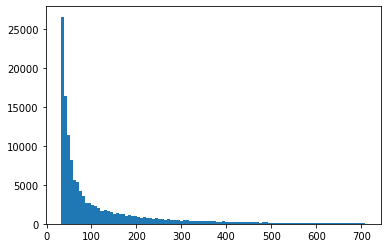

In [3]:
#We start out by masking out halos with no subhalohalo_table['GroupFirstSub'])
print(len(halo_table['GroupNsubs']))

#plt.hist(halo_table['GroupLen'], bins=100)
sorted = np.sort(halo_table['GroupLen'])
print(sorted[0:130000])

plt.hist(sorted[0:130000], bins=100)

In [4]:
#Applying basic subahlo cuts to remove junk data:
print(len(subhalo_table))

print('First, subhalo flag:')
subhalo_table = subhalo_table[subhalo_table['SubhaloFlag']]
print(len(subhalo_table))
print('Flag mask complete\n')

print("Next, remove things with no mass.")
subhalo_table = subhalo_table[subhalo_table['SubhaloMass']!=0]
print(len(subhalo_table))
print('Mass Mask complete\n')


print("Next, remove things with no stellar mass.")
subhalo_table = subhalo_table[subhalo_table['SubhaloMassType'][:,4]!=0]
print(len(subhalo_table))
print('Stellar Mass Mask complete \n')

print("Now, remove things with no photometry.")
mask = subhalo_table['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask[:,0]
for i in range (1,8):
    photo_mask = photo_mask & mask[:,i]
subhalo_table = subhalo_table[photo_mask]
print(len(subhalo_table))
print('Photo Mask complete \n\n')
pre_masscut = subhalo_table

"""
print("Applying more specific cuts of interest...\n")
mass_cut = 9
print("Cut objects with mass less than 10^"+str(mass_cut)+" Msun.")
subhalomass = np.array(np.log10(subhalo_table['SubhaloMassInHalfRad']*1e10))
mask = subhalomass > mass_cut
subhalo_table = subhalo_table[mask]
"""


131761
First, subhalo flag:
131349
Flag mask complete

Next, remove things with no mass.
131349
Mass Mask complete

Next, remove things with no stellar mass.
24619
Stellar Mass Mask complete 

Now, remove things with no photometry.
24619
Photo Mask complete 


Applying more specific cuts of interest...

Cut objects with mass less than 10^9 Msun.


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


In [ ]:
subhalomass = np.array(np.log10(subhalo_table["SubhaloMassInHalfRad"]*1e10))
mask = subhalomass > 10.3
st = subhalo_table[mask]

fig, ax = plt.subplots(4,2)
fig.set_size_inches(16,20)
plt.subplots_adjust(hspace = 0.5)
band_names = ['U', 'B', 'V','K', 'g', 'r', 'i', 'z']
for bands in range(8):
    mag = st['SubhaloStellarPhotometrics'][:,bands]
    ax[bands%4][bands//4].hist(mag, bins=50)
    ax[bands%4][bands//4].set_xlabel('magnitude in ' + band_names[bands] + " band", fontsize = 16 )
    ax[bands%4][bands//4].set_ylabel('count', fontsize = 16)

plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


15256
4037

4600
1792

278
260

24619
4378



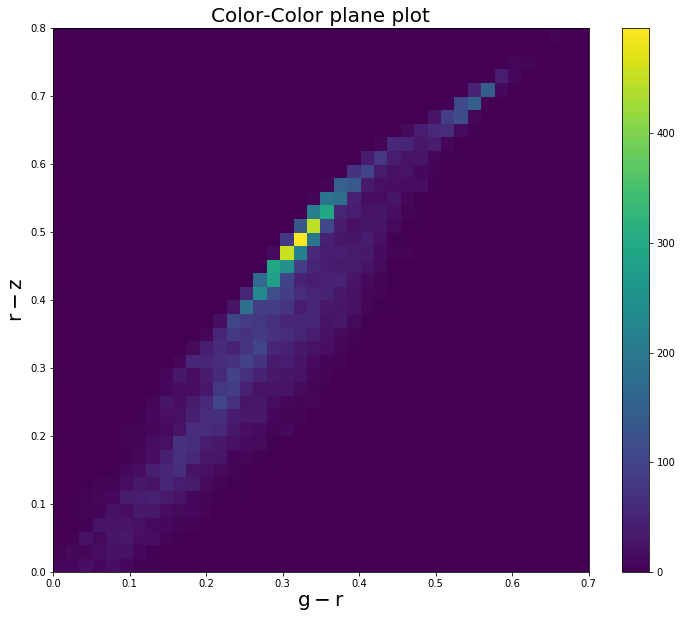

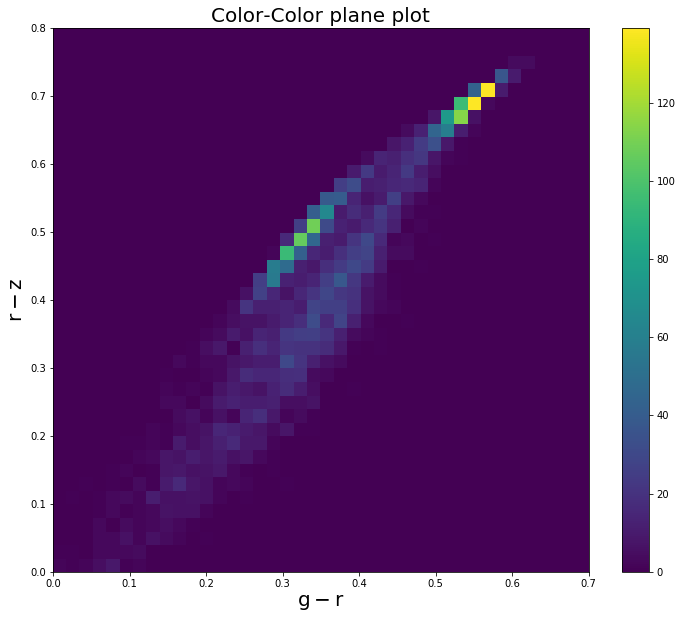

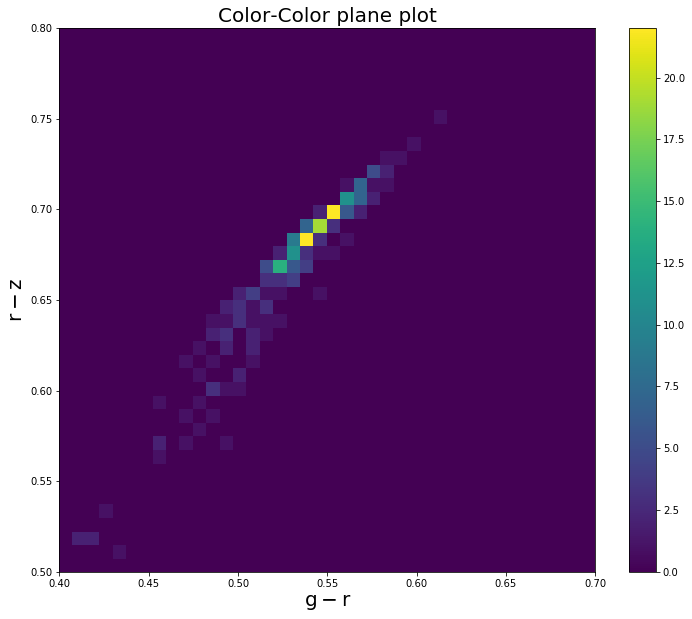

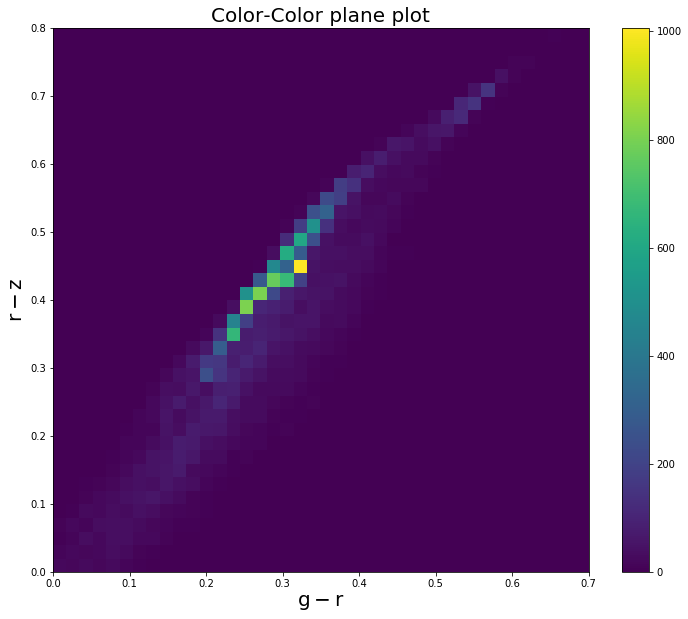

In [40]:
subhalo_table = cut(pre_masscut, 'SubhaloMassInHalfRad', 9.5)
color_color(subhalo_table['SubhaloStellarPhotometrics'], 0.0, 0.0)

subhalo_table = cut(pre_masscut, 'SubhaloMassInHalfRad', 10.3)
color_color(subhalo_table['SubhaloStellarPhotometrics'], 0.0, 0.0)

subhalo_table = cut(pre_masscut, 'SubhaloMassInHalfRad', 11)
color_color(subhalo_table['SubhaloStellarPhotometrics'], 0.4, 0.5)

subhalo_table = cut(pre_masscut, 'SubhaloMass', 9)
color_color(subhalo_table['SubhaloStellarPhotometrics'], 0.0, 0.0)


In [38]:
def color_color(mag, r1, r2):
    g_minus_r = mag[:,4]-mag[:,5]
    r_minus_z = mag[:,5]-mag[:,7]
    plt.figure(figsize=(12,10))
    heights, gmr, rmz = np.histogram2d(g_minus_r,r_minus_z,bins=150)
    plt.hist2d(r_minus_z, g_minus_r, bins = 40, cmap='viridis', range=[[r1, 0.7], [r2, 0.8]])
    plt.xlabel("$\mathrm{g-r}$", fontsize = 20)
    plt.ylabel("$\mathrm{r-z}$", fontsize = 20)
    plt.title("Color-Color plane plot", fontsize = 20)
    plt.colorbar()
    print(len(g_minus_r))
    print(str(len(g_minus_r[g_minus_r>0.5])) + "\n")
    levels = np.linspace(0, 40,num=4)
    #plt.contour(rmz[0:150], gmr[0:150], heights, levels=levels, 
                #extent=[0,0,0.7,0.8], colors=['red','orange','pink','green'])

In [31]:
def cut(table, field, num):
    subhalomass = np.array(np.log10(table[field]*1e10))
    mask = subhalomass > num
    return table[mask]